In [1]:
#!pip install spacy-langdetect
#!conda install umap.umap_

In [2]:
import pandas as pd
import numpy 
import os
import matplotlib.pyplot as plt
import sys
import nltk
import sklearn
from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.decomposition import FactorAnalysis
from nltk.text import Text
from nltk.tokenize import RegexpTokenizer
from sklearn.preprocessing import LabelEncoder
from sklearn.manifold import TSNE
from sklearn.naive_bayes import MultinomialNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.svm import LinearSVC, SVC
from sklearn import metrics
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.preprocessing import MinMaxScaler
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import HistGradientBoostingClassifier
from sklearn.decomposition import LatentDirichletAllocation,TruncatedSVD,NMF
import spacy
from spacy.language import Language
from spacy_langdetect import LanguageDetector
from unidecode import unidecode
from  spacy.lang.en.stop_words import STOP_WORDS
from gensim.models import Word2Vec
from gensim.models.word2vec import LineSentence
from nltk.tokenize import word_tokenize
from gensim.test.utils import datapath
from gensim import utils
import gensim.downloader
from xgboost import XGBClassifier
import lightgbm as lgb
from wordcloud import WordCloud
import pandas as pd
import numpy as np
import plotly_express as px
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer
from itertools import permutations

In [ ]:
data = pd.read_csv("path//Database.csv")

In [4]:
for row in range(data.shape[0]):
    if str(data.loc[row]["Paroles"]).startswith("Soumettre") or str(data.loc[row]["Paroles"]).startswith("Parole"):
        data = data.drop([row])
data = data.reset_index()
data = data.drop(columns=["index"])
data.head()

,Artiste,Sexe,Style,Decennie,Chanson,Paroles
0,2pac,Homme,Rap/Hip-Hop,1990s,changes,"[2Pac]I see no changes, wake up in the mornin..."
1,2pac,Homme,Rap/Hip-Hop,1990s,hit-em-up,"[Tyga]I said fuck them other niggas, cause I'..."
2,2pac,Homme,Rap/Hip-Hop,1990s,all-eyez-on-me,[2pac]I bet you got it twistedYou don't know ...
3,2pac,Homme,Rap/Hip-Hop,1990s,do-for-love,"Turn it up loud Hahaha, ahahaha, hey man You ..."
4,2pac,Homme,Rap/Hip-Hop,1990s,dear-mama,You are appreciated[Verse One: 2Pac]When I wa...


In [5]:
data['Style'].value_counts()

Style
Pop            1182
Rap/Hip-Hop    1109
Rock           1091
Name: count, dtype: int64

In [6]:
data['Decennie'].value_counts()

Decennie
1990s    1157
2000s    1136
2010s    1089
Name: count, dtype: int64

In [7]:
data['Sexe'].value_counts()

Sexe
Homme     2388
Femme      936
Groupe      58
Name: count, dtype: int64

In [8]:
data['Artiste'].value_counts()

Artiste
justin-timberlake    60
r-e-m                60
michael-jackson      60
eminem               60
bruno-mars           60
                     ..
lil-wayne            45
arctic-monkeys       45
fall-out-boy         44
j-cole               43
incubus              19
Name: count, Length: 63, dtype: int64

In [9]:
data.shape

(3382, 6)

In [10]:
data.isnull().sum()

Artiste     0
Sexe        0
Style       0
Decennie    0
Chanson     0
Paroles     0
dtype: int64

In [11]:
#spacy.cli.download("en_core_web_sm")
nlp = spacy.load("en_core_web_sm")

lyrics_lemmatized = []

lyrics_lemmatized= data.Paroles.apply(lambda x: 
                                       " ".join(token.lemma_ for token in nlp(x)
                                                if (not token.is_stop and not token.is_punct and not token.like_num and token.pos_ in ['PROPN', 'NOUN', 'ADJ'])))

data['lyrics_lemmatized'] = lyrics_lemmatized
data.head()

,Artiste,Sexe,Style,Decennie,Chanson,Paroles,lyrics_lemmatized
0,2pac,Homme,Rap/Hip-Hop,1990s,changes,"[2Pac]I see no changes, wake up in the mornin...",2pac]i change morning myselfIs life worth livi...
1,2pac,Homme,Rap/Hip-Hop,1990s,hit-em-up,"[Tyga]I said fuck them other niggas, cause I'...",Tyga]I niggas niggasfuck niggas niggasfuck nig...
2,2pac,Homme,Rap/Hip-Hop,1990s,all-eyez-on-me,[2pac]I bet you got it twistedYou don't know ...,trustso playa niggas ready funk depth hell cow...
3,2pac,Homme,Rap/Hip-Hop,1990s,do-for-love,"Turn it up loud Hahaha, ahahaha, hey man You ...",Hahaha ahahaha man little sucker love right wo...
4,2pac,Homme,Rap/Hip-Hop,1990s,dear-mama,You are appreciated[Verse One: 2Pac]When I wa...,young mama year old streetsthough time woman a...


In [ ]:
# Spécifiez le chemin du fichier CSV
chemin_fichier_csv = 'path/Donnee_test.csv'

# Utilisez to_csv pour sauvegarder le DataFrame au format CSV
data.to_csv(chemin_fichier_csv, index=False)

In [13]:
rap_1990 = data.loc[data["Style"]=="Rap/Hip-Hop"].loc[data["Decennie"]=="1990s"]
rap_2000 = data.loc[data["Style"]=="Rap/Hip-Hop"].loc[data["Decennie"]=="2000s"]
rap_2010 = data.loc[data["Style"]=="Rap/Hip-Hop"].loc[data["Decennie"]=="2010s"]

rock_1990 = data.loc[data["Style"]=="Rock"].loc[data["Decennie"]=="1990s"]
rock_2000 = data.loc[data["Style"]=="Rock"].loc[data["Decennie"]=="2000s"]
rock_2010 = data.loc[data["Style"]=="Rock"].loc[data["Decennie"]=="2010s"]

pop_1990 = data.loc[data["Style"]=="Pop"].loc[data["Decennie"]=="1990s"]
pop_2000 = data.loc[data["Style"]=="Pop"].loc[data["Decennie"]=="2000s"]
pop_2010 = data.loc[data["Style"]=="Pop"].loc[data["Decennie"]=="2010s"]


# Rap

### 1990

In [14]:
vec = CountVectorizer(stop_words='english', lowercase=True, encoding='utf-8')
# max_features : top max_features ordered by term frequency across the corpus
X_rap_1990 = vec.fit_transform(rap_1990.lyrics_lemmatized)
# X sparse doit être transformé en matrice non sparse pour les traitements ultérieurs
df_rap_1990 = pd.DataFrame(X_rap_1990.toarray(), columns=vec.get_feature_names_out())

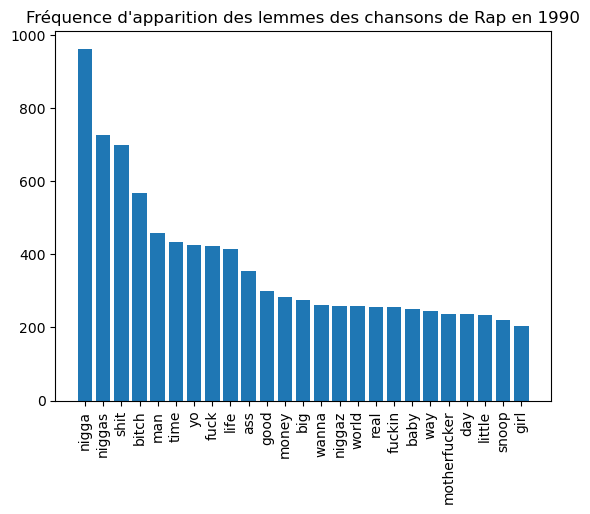

In [15]:
freqs = [(word, X_rap_1990.getcol(idx).sum()) for word, idx in vec.vocabulary_.items()]
freqs = sorted(freqs, key=lambda x: -x[1])

plt.bar([x[0] for x in freqs[:25]], [x[1] for x in freqs[:25]])
plt.xticks(rotation=90)
plt.title("Fréquence d'apparition des lemmes des chansons de Rap en 1990")
plt.show()

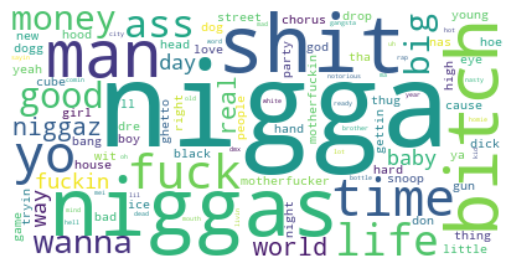

In [16]:
# nuage de mots à partir de la matrice documents x termes
wordcloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(df_rap_1990.T.sum(axis=1))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 2000

In [17]:
vec = CountVectorizer(stop_words='english', lowercase=True, min_df=20, encoding='utf-8')
# max_features : top max_features ordered by term frequency across the corpus
X_rap_2000 = vec.fit_transform(rap_2000.lyrics_lemmatized)
# X sparse doit être transformé en matrice non sparse pour les traitements ultérieurs
df_rap_2000 = pd.DataFrame(X_rap_2000.toarray(), columns=vec.get_feature_names_out())

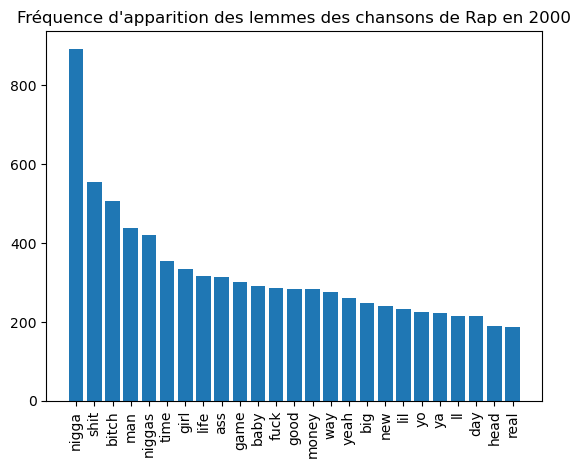

In [18]:
freqs = [(word, X_rap_2000.getcol(idx).sum()) for word, idx in vec.vocabulary_.items()]
freqs = sorted(freqs, key=lambda x: -x[1])

plt.bar([x[0] for x in freqs[:25]], [x[1] for x in freqs[:25]])
plt.xticks(rotation=90)
plt.title("Fréquence d'apparition des lemmes des chansons de Rap en 2000")
plt.show()

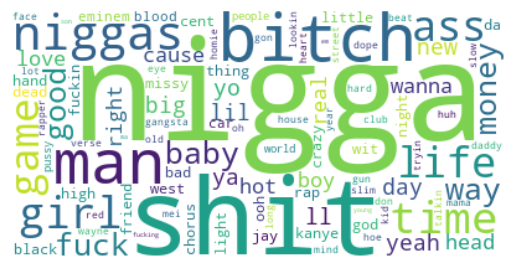

In [19]:
# nuage de mots à partir de la matrice documents x termes
wordcloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(df_rap_2000.T.sum(axis=1))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 2010

In [20]:
vec = CountVectorizer(stop_words='english', lowercase=True, min_df=20, encoding='utf-8')
# max_features : top max_features ordered by term frequency across the corpus
X_rap_2010 = vec.fit_transform(rap_2010.lyrics_lemmatized)
# X sparse doit être transformé en matrice non sparse pour les traitements ultérieurs
df_rap_2010 = pd.DataFrame(X_rap_2010.toarray(), columns=vec.get_feature_names_out())

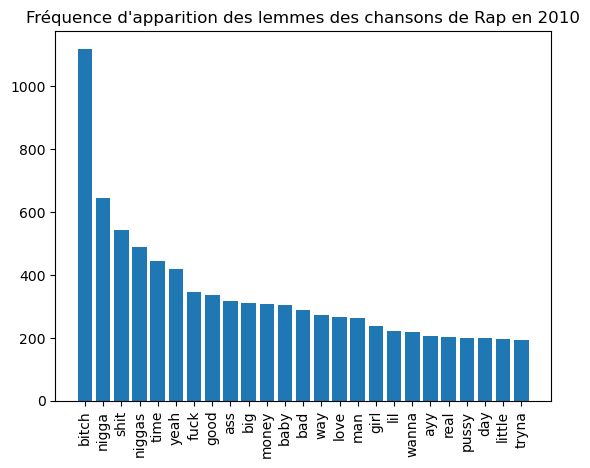

In [21]:
freqs = [(word, X_rap_2010.getcol(idx).sum()) for word, idx in vec.vocabulary_.items()]
freqs = sorted(freqs, key=lambda x: -x[1])

plt.bar([x[0] for x in freqs[:25]], [x[1] for x in freqs[:25]])
plt.xticks(rotation=90)
plt.title("Fréquence d'apparition des lemmes des chansons de Rap en 2010")
plt.show()

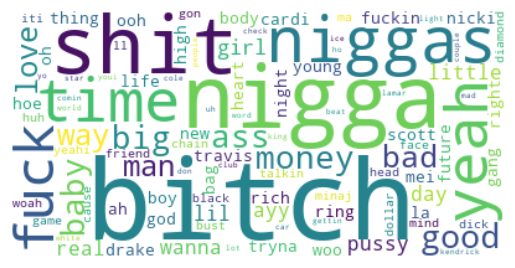

In [22]:
# nuage de mots à partir de la matrice documents x termes
wordcloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(df_rap_2010.T.sum(axis=1))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Rock

### 1990

In [23]:
vec = CountVectorizer(stop_words='english', lowercase=True, min_df=20, encoding='utf-8')
# max_features : top max_features ordered by term frequency across the corpus
X_rock_1990 = vec.fit_transform(rock_1990.lyrics_lemmatized)
# X sparse doit être transformé en matrice non sparse pour les traitements ultérieurs
df_rock_1990 = pd.DataFrame(X_rock_1990.toarray(), columns=vec.get_feature_names_out())

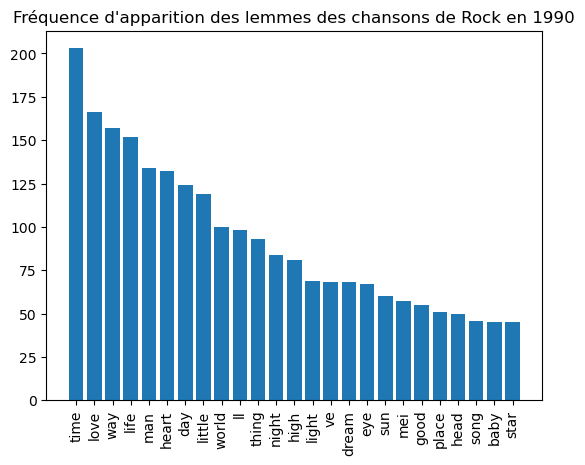

In [24]:
freqs = [(word, X_rock_1990.getcol(idx).sum()) for word, idx in vec.vocabulary_.items()]
freqs = sorted(freqs, key=lambda x: -x[1])

plt.bar([x[0] for x in freqs[:25]], [x[1] for x in freqs[:25]])
plt.xticks(rotation=90)
plt.title("Fréquence d'apparition des lemmes des chansons de Rock en 1990")
plt.show()

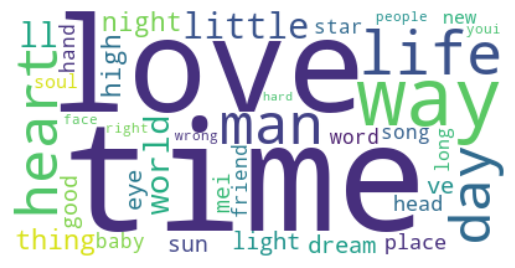

In [25]:
# nuage de mots à partir de la matrice documents x termes
wordcloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(df_rock_1990.T.sum(axis=1))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 2000

In [26]:
vec = CountVectorizer(stop_words='english', lowercase=True, min_df=20, encoding='utf-8')
# max_features : top max_features ordered by term frequency across the corpus
X_rock_2000 = vec.fit_transform(rock_2000.lyrics_lemmatized)
# X sparse doit être transformé en matrice non sparse pour les traitements ultérieurs
df_rock_2000 = pd.DataFrame(X_rock_2000.toarray(), columns=vec.get_feature_names_out())

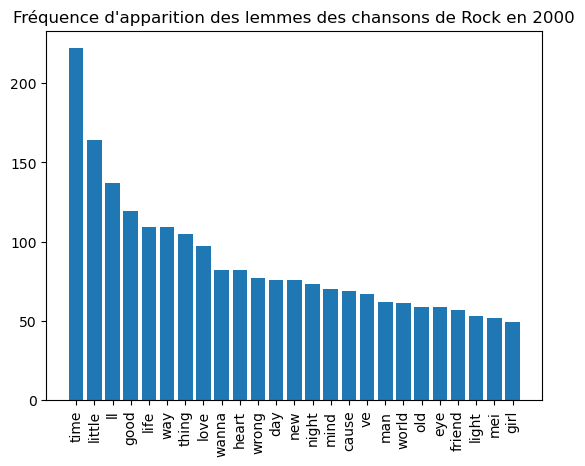

In [27]:
freqs = [(word, X_rock_2000.getcol(idx).sum()) for word, idx in vec.vocabulary_.items()]
freqs = sorted(freqs, key=lambda x: -x[1])

plt.bar([x[0] for x in freqs[:25]], [x[1] for x in freqs[:25]])
plt.xticks(rotation=90)
plt.title("Fréquence d'apparition des lemmes des chansons de Rock en 2000")
plt.show()

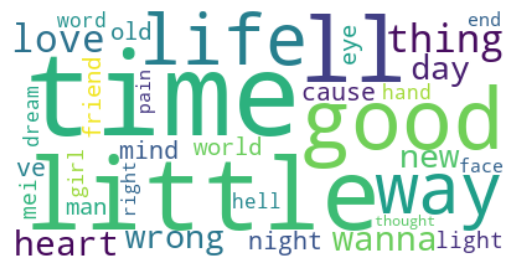

In [28]:
# nuage de mots à partir de la matrice documents x termes
wordcloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(df_rock_2000.T.sum(axis=1))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 2010

In [29]:
vec = CountVectorizer(stop_words='english', lowercase=True, min_df=20, encoding='utf-8')
# max_features : top max_features ordered by term frequency across the corpus
X_rock_2010 = vec.fit_transform(rock_2010.lyrics_lemmatized)
# X sparse doit être transformé en matrice non sparse pour les traitements ultérieurs
df_rock_2010 = pd.DataFrame(X_rock_2010.toarray(), columns=vec.get_feature_names_out())

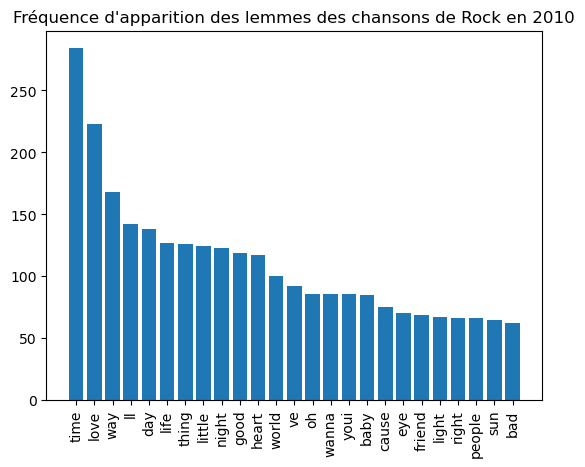

In [30]:
freqs = [(word, X_rock_2010.getcol(idx).sum()) for word, idx in vec.vocabulary_.items()]
freqs = sorted(freqs, key=lambda x: -x[1])

plt.bar([x[0] for x in freqs[:25]], [x[1] for x in freqs[:25]])
plt.xticks(rotation=90)
plt.title("Fréquence d'apparition des lemmes des chansons de Rock en 2010")
plt.show()

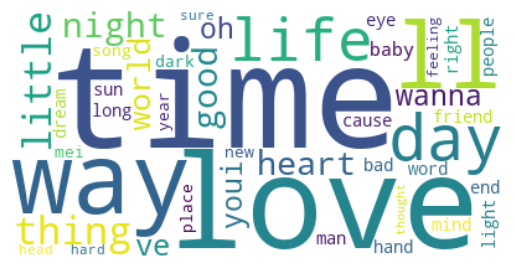

In [31]:
# nuage de mots à partir de la matrice documents x termes
wordcloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(df_rock_2010.T.sum(axis=1))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

# Pop

### 1990

In [32]:
vec = CountVectorizer(stop_words='english', lowercase=True, min_df=20, encoding='utf-8')
# max_features : top max_features ordered by term frequency across the corpus
X_pop_1990 = vec.fit_transform(pop_1990.lyrics_lemmatized)
# X sparse doit être transformé en matrice non sparse pour les traitements ultérieurs
df_pop_1990 = pd.DataFrame(X_pop_1990.toarray(), columns=vec.get_feature_names_out())

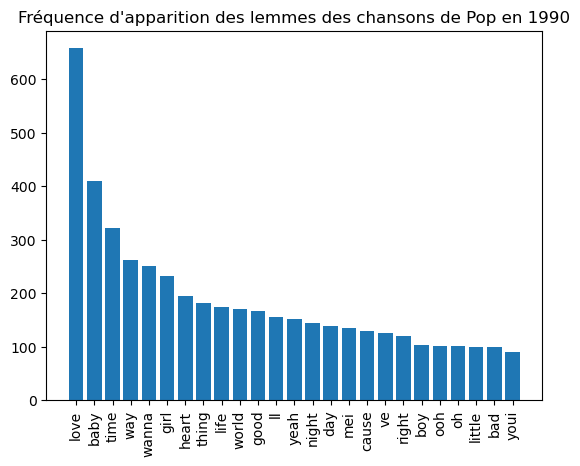

In [33]:
freqs = [(word, X_pop_1990.getcol(idx).sum()) for word, idx in vec.vocabulary_.items()]
freqs = sorted(freqs, key=lambda x: -x[1])

plt.bar([x[0] for x in freqs[:25]], [x[1] for x in freqs[:25]])
plt.xticks(rotation=90)
plt.title("Fréquence d'apparition des lemmes des chansons de Pop en 1990")
plt.show()

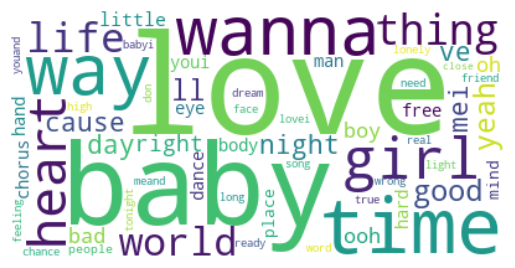

In [34]:
# nuage de mots à partir de la matrice documents x termes
wordcloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(df_pop_1990.T.sum(axis=1))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 2000

In [35]:
vec = CountVectorizer(stop_words='english', lowercase=True, min_df=20, encoding='utf-8')
# max_features : top max_features ordered by term frequency across the corpus
X_pop_2000 = vec.fit_transform(pop_2000.lyrics_lemmatized)
# X sparse doit être transformé en matrice non sparse pour les traitements ultérieurs
df_pop_2000 = pd.DataFrame(X_pop_2000.toarray(), columns=vec.get_feature_names_out())

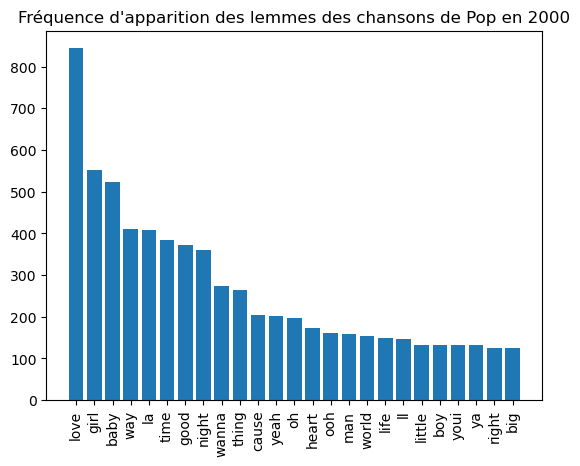

In [36]:
freqs = [(word, X_pop_2000.getcol(idx).sum()) for word, idx in vec.vocabulary_.items()]
freqs = sorted(freqs, key=lambda x: -x[1])

plt.bar([x[0] for x in freqs[:25]], [x[1] for x in freqs[:25]])
plt.xticks(rotation=90)
plt.title("Fréquence d'apparition des lemmes des chansons de Pop en 2000")
plt.show()

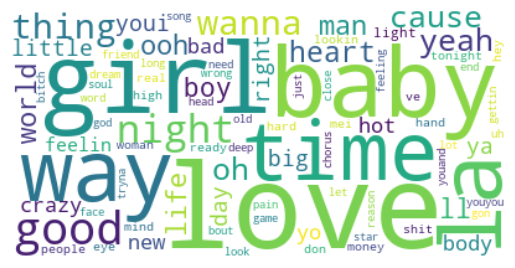

In [37]:
# nuage de mots à partir de la matrice documents x termes
wordcloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(df_pop_2000.T.sum(axis=1))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

### 2010

In [38]:
vec = CountVectorizer(stop_words='english', lowercase=True, min_df=20, encoding='utf-8')
# max_features : top max_features ordered by term frequency across the corpus
X_pop_2010 = vec.fit_transform(pop_2010.lyrics_lemmatized)
# X sparse doit être transformé en matrice non sparse pour les traitements ultérieurs
df_pop_2010 = pd.DataFrame(X_pop_2010.toarray(), columns=vec.get_feature_names_out())

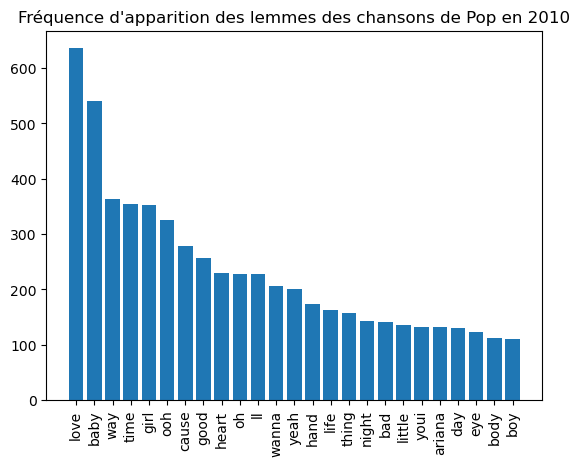

In [39]:
freqs = [(word, X_pop_2010.getcol(idx).sum()) for word, idx in vec.vocabulary_.items()]
freqs = sorted(freqs, key=lambda x: -x[1])

plt.bar([x[0] for x in freqs[:25]], [x[1] for x in freqs[:25]])
plt.xticks(rotation=90)
plt.title("Fréquence d'apparition des lemmes des chansons de Pop en 2010")
plt.show()

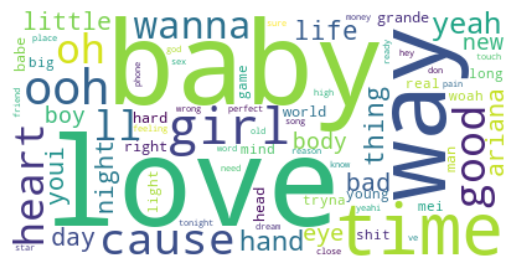

In [40]:
# nuage de mots à partir de la matrice documents x termes
wordcloud = WordCloud(background_color="white", max_words=100).generate_from_frequencies(df_pop_2010.T.sum(axis=1))
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Faire n-grams ( Associer mot pour voir signification)
Classifier les rappeurs(pop, rock) par thematiques

# Analyse de thematique

### General

In [41]:
tokenizer = RegexpTokenizer(r'\w+')

# Vectorize document using TF-IDF
tfidf = TfidfVectorizer(lowercase=True, stop_words='english', ngram_range = (1,3), tokenizer = tokenizer.tokenize)

# Fit and Transform the documents
X = tfidf.fit_transform(data.lyrics_lemmatized)  

c:\Users\monke\Anaconda2\Lib\site-packages\sklearn\feature_extraction\text.py:525: UserWarning: The parameter 'token_pattern' will not be used since 'tokenizer' is not None'
  warnings.warn(


In [42]:
X = vec.fit_transform(data.lyrics_lemmatized)

lda = LatentDirichletAllocation(n_components=6, random_state=123, doc_topic_prior=0.3, n_jobs=4)
#lda = NMF(n_components=6, random_state=123, init="nndsvda", beta_loss="frobenius", alpha_W=0.00005, alpha_H=0.00005, l1_ratio=1)
#lda = TruncatedSVD(n_components=6, n_iter=10, algorithm='arpack', random_state=123)
lda_matrix = lda.fit_transform(X)
dominant_topics = lda_matrix.argmax(axis=1)

In [43]:
# Croisement thematiques avec genre musical
df = pd.DataFrame({'Topic': dominant_topics, 'Style': data['Style']})
cross_tab = pd.crosstab(df['Style'],df['Topic'])
diagonal = cross_tab.values.diagonal()

#Rearrangement des thematiques avt Croisement thematiques avec genre musical
initial_percentage = (diagonal.sum() / cross_tab.values.sum())
column_permutations = list(permutations(cross_tab.columns))
accuracy = initial_percentage
for permutation in column_permutations:
    permuted_cross_tab = cross_tab[list(permutation)]
    permuted_diagonal = permuted_cross_tab.values.diagonal()
    permuted_percentage = (permuted_diagonal.sum() / permuted_cross_tab.values.sum())
    if permuted_percentage > accuracy:
        accuracy = permuted_percentage
        cross_tab = permuted_cross_tab
print(cross_tab)
print('\nAccuracy: %.3f' % accuracy)

Topic          4    5    1    0    2    3
Style                                    
Pop          477   64  182  211  129  119
Rap/Hip-Hop   52  713  178   52   84   30
Rock         352   38  365  144  156   36

Accuracy: 0.460


In [44]:
# Croisement thematiques avec genre musical
df = pd.DataFrame({'Topic': dominant_topics, 'Artiste': data['Artiste']})
cross_tab = pd.crosstab(df['Artiste'],df['Topic'])
diagonal = cross_tab.values.diagonal()

#Rearrangement des thematiques avt Croisement thematiques avec genre musical
initial_percentage = (diagonal.sum() / cross_tab.values.sum())
column_permutations = list(permutations(cross_tab.columns))
accuracy = initial_percentage
for permutation in column_permutations:
    permuted_cross_tab = cross_tab[list(permutation)]
    permuted_diagonal = permuted_cross_tab.values.diagonal()
    permuted_percentage = (permuted_diagonal.sum() / permuted_cross_tab.values.sum())
    if permuted_percentage > accuracy:
        accuracy = permuted_percentage
        cross_tab = permuted_cross_tab
print(cross_tab)
print('\nAccuracy: %.3f' % accuracy)

Topic               1   5   4   2   3   0
Artiste                                  
2pac               12  42   2   1   0   0
50-cent             3  51   0   1   0   3
alicia-keys        14   3  19   7   3   9
arctic-monkeys     12   2   9  10   2  10
ariana-grande       9   3  14   7  14   5
...                ..  ..  ..  ..  ..  ..
travis-scott        2  14   6  29   1   0
twenty-one-pilots  29   0   8   3   4   5
u2                 19   2  27   7   0   4
usher               7   4  17  11   6  13
whitney-houston    11   0  40   0   1   7

[63 rows x 6 columns]

Accuracy: 0.035


In [45]:
terms = vec.get_feature_names_out()

# Get Components 
lda_components=lda.components_

for index, component in enumerate(lda_components):
    zipped = zip(terms, component)
    top_terms_key=sorted(zipped, key = lambda t: t[1], reverse=True)[:10]
    #top_terms_list=list(dict(top_terms_key).keys())
    top_terms_list=[words[0] for words in top_terms_key]

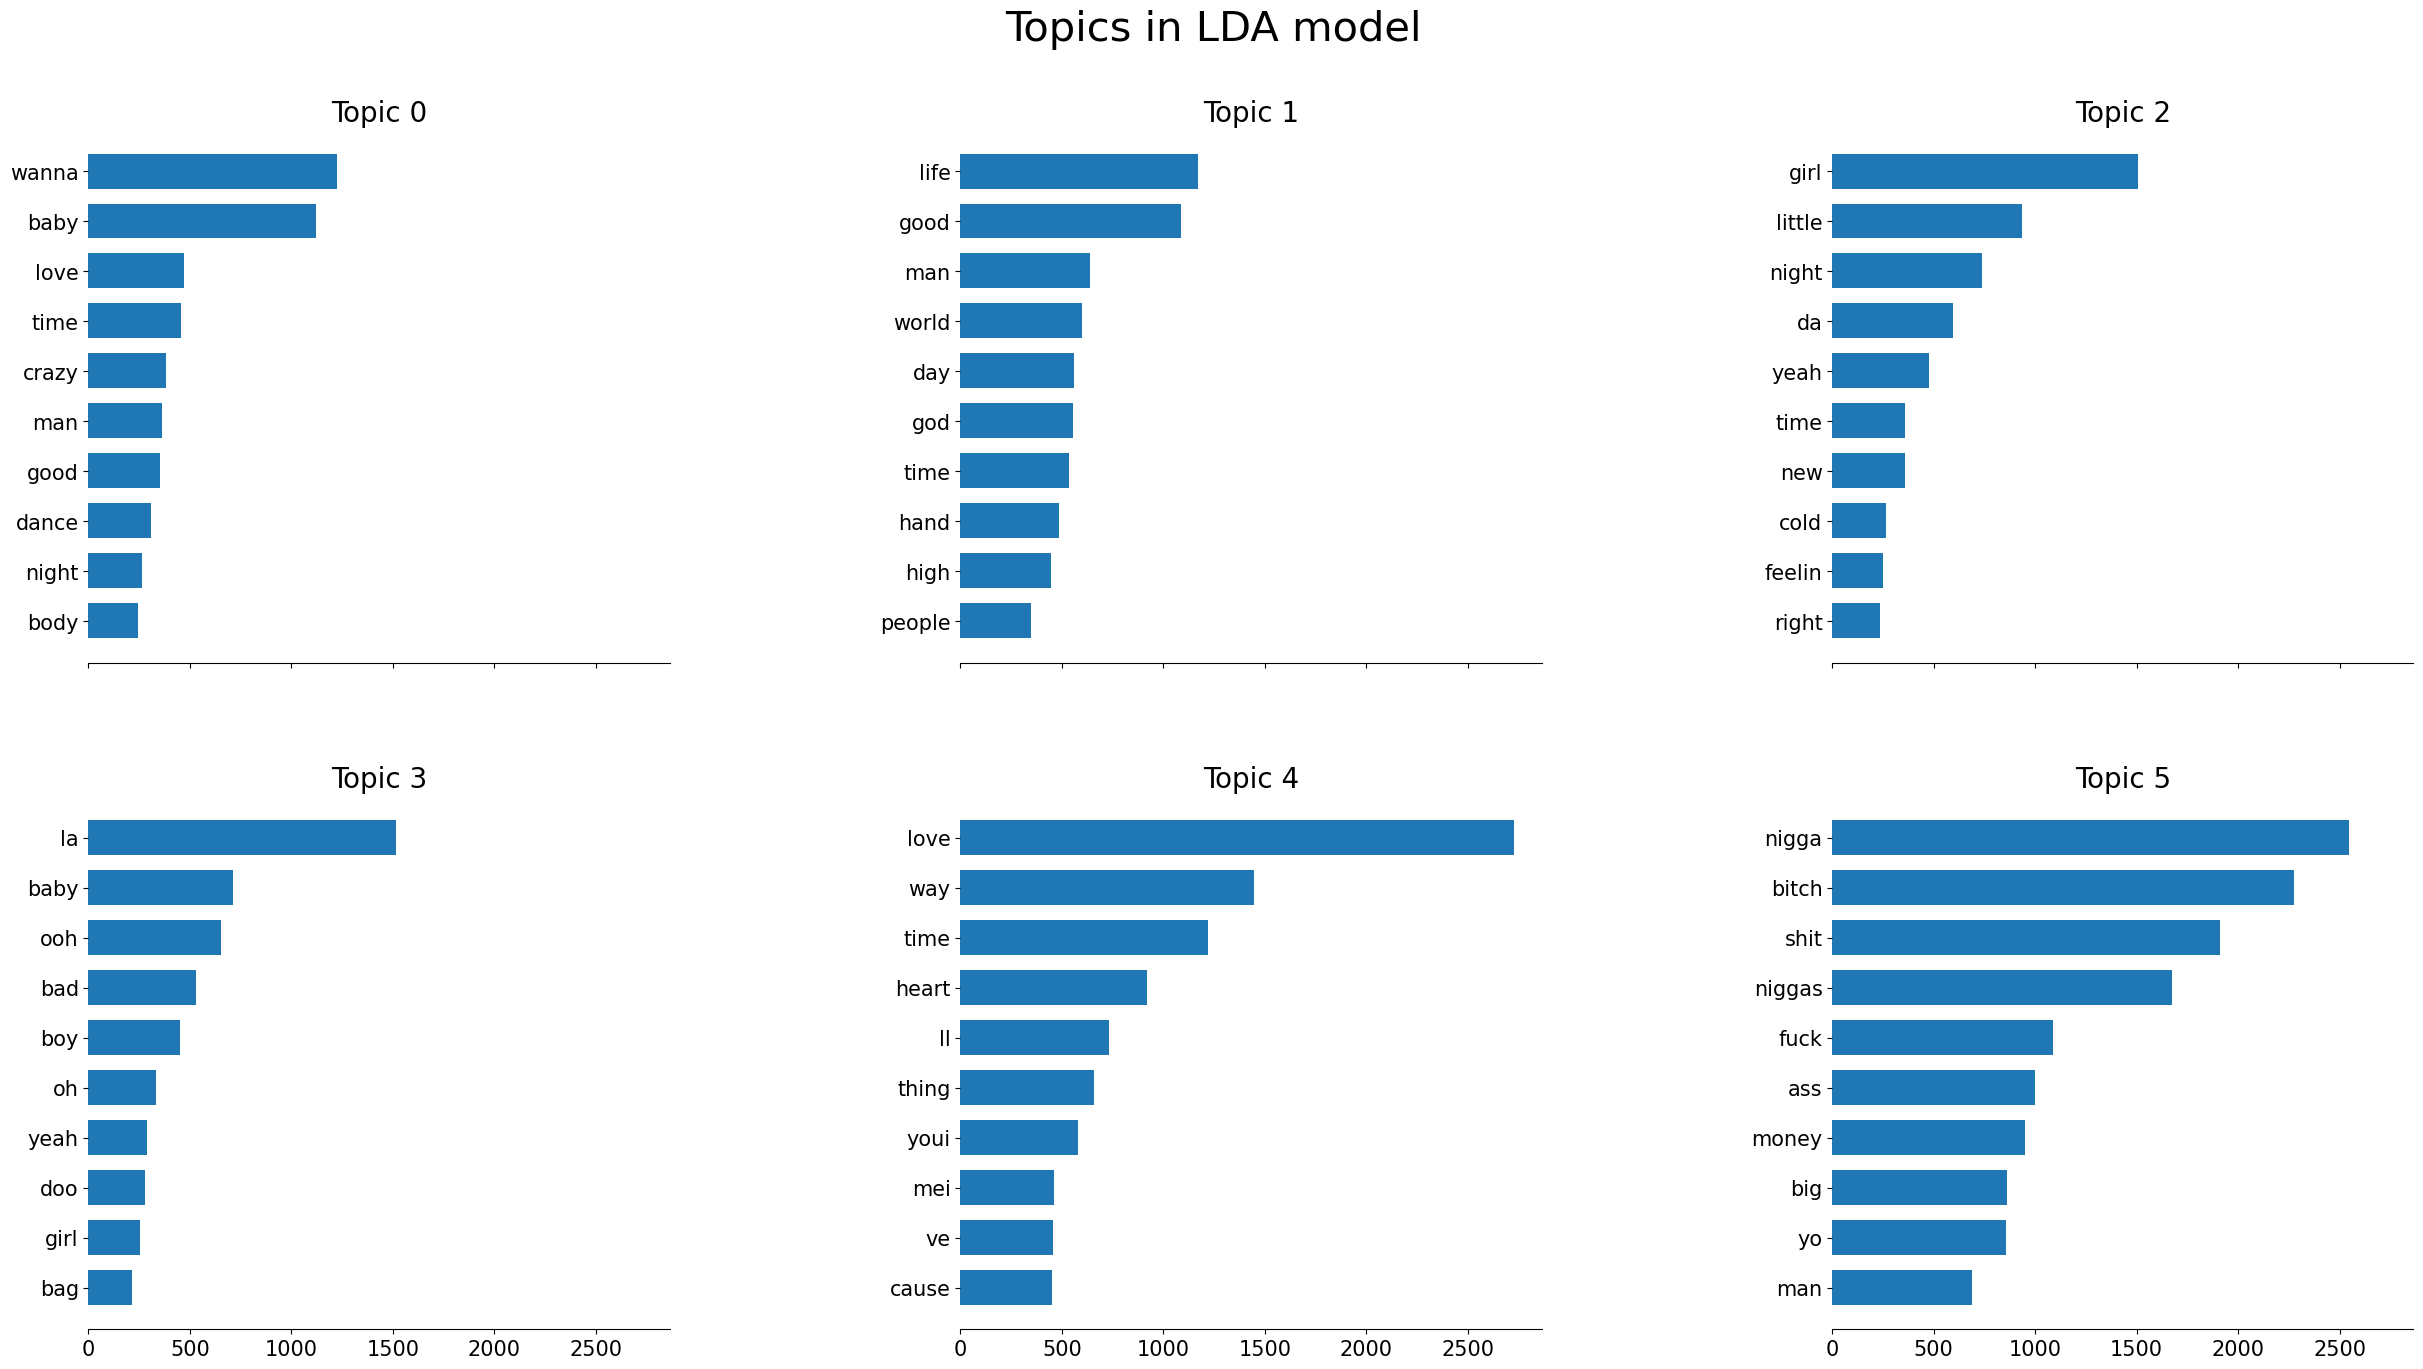

In [46]:
def plot_top_words(model, feature_names, n_top_words, title):
    fig, axes = plt.subplots(2, 3, figsize=(30, 15), sharex=True)
    axes = axes.flatten()
    for index, topic in enumerate(lda_components):
        top_features_key = topic.argsort()[: -n_top_words - 1 : -1]
        top_features = [feature_names[i] for i in top_features_key]
        weights = topic[top_features_key]
        
        ax = axes[index]
        ax.barh(top_features, weights, height=0.7)
        ax.set_title(f"Topic {index}", fontdict={"fontsize": 20})
        ax.invert_yaxis()
        ax.tick_params(axis="both", which="major", labelsize=15)
        for i in "top right left".split():
            ax.spines[i].set_visible(False)
        fig.suptitle(title, fontsize=30)

    plt.subplots_adjust(top=0.90, bottom=0.1, wspace=0.50, hspace=0.25)
    plt.show()
    
n_top_words = 10
plot_top_words(lda, terms, n_top_words, "Topics in LDA model")

In [47]:
# création d'un data frame avec en colonnes les probabilités des thématiques et la thématique dominante
# de chaque document
topicnames = ["Topic" + str(i) for i in range(lda.n_components)] # index names
docnames = ["Son" + str(i) for i in range(X.shape[0])] # Make the pandas dataframe
df_document_topic = pd.DataFrame(np.round(lda_matrix, 3), columns=topicnames, index=docnames) # Get dominant topic for each document
dominant_topic = np.argmax(df_document_topic.values, axis=1)
df_document_topic['dominant_topic'] = dominant_topic
data["Label"] = dominant_topic
data["Label"] = data["Label"].apply(lambda x:str(x))

topics = ["Relationship","Hope","Love","seeking partner","Emotions","Identity"]
data["Label"] = data["Label"].str.replace("0","Relationship")
data["Label"] = data["Label"].str.replace("1","Hope")
data["Label"] = data["Label"].str.replace("2","Love")
data["Label"] = data["Label"].str.replace("3","seeking partner")
data["Label"] = data["Label"].str.replace("4","Emotions")
data["Label"] = data["Label"].str.replace("5","Identity")

#df_document_topic

Topic: Relationship
Artists


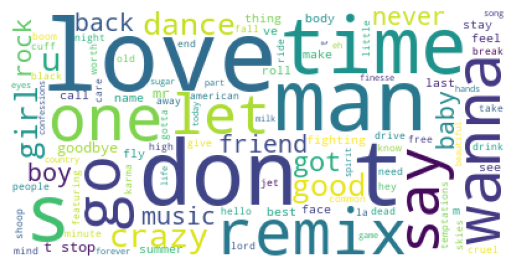

Topic: Hope
Artists


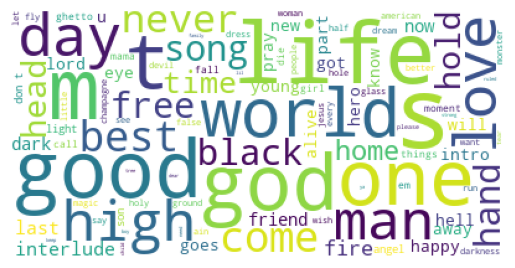

Topic: Love
Artists


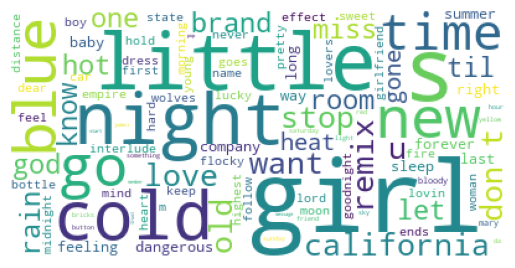

Topic: seeking partner
Artists


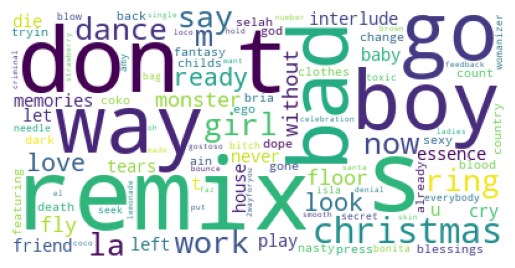

Topic: Emotions
Artists


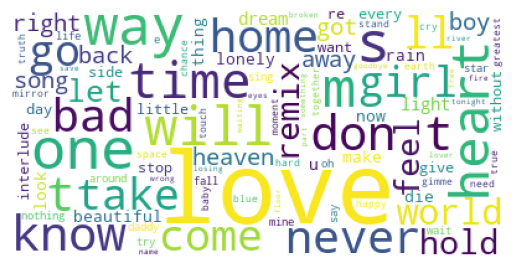

Topic: Identity
Artists


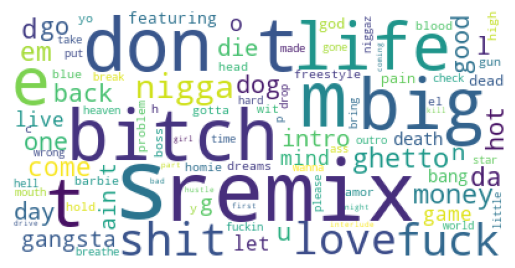

In [48]:
# Remplacer par diagramme en baton en ponderant (nbre de chanson dans le topic/ par nbre de chanson total)
for k in range(lda.n_components):
   cl_data = data.loc[data["Label"] == topics[k]]
   
   unique_artists = cl_data['Chanson'].unique()
   #unique_artists_processed = [artist.replace('-', '_') for artist in unique_artists]
   text = ' '.join(unique_artists) # Join unique artist names with spaces
   wordcloud = WordCloud(max_font_size=80, max_words=100, background_color="white").generate(text)
   print(f'Topic: {topics[k]}')
   print('Artists')
   plt.figure()
   plt.imshow(wordcloud, interpolation='hanning')
   plt.axis("off")
   plt.show()

In [ ]:
# Spécifiez le chemin du fichier CSV
chemin_fichier_csv = 'path/Donnee_test.csv'

# Utilisez to_csv pour sauvegarder le DataFrame au format CSV
data.to_csv(chemin_fichier_csv, index=False)

In [50]:
# Pour classifier les rappeurs par thematique

artistes = data["Artiste"].unique()
indice = []
for art in artistes:
    test = data.loc[data["Artiste"]==art]
    test = test["Label"].value_counts()
    position = np.where(test==test.max())
    indice.append(test.index[position][0])
    
test = pd.DataFrame({"Artiste":artistes,
                     "Topic":indice})

test

,Artiste,Topic
0,2pac,Identity
1,dr-dre,Identity
2,nas,Identity
3,snoop-dogg,Identity
4,notorious-b-i-g,Identity
...,...,...
58,arctic-monkeys,Hope
59,the-black-keys,Emotions
60,paramore,Emotions
61,fall-out-boy,Emotions


In [51]:
test_chart = test["Topic"].value_counts()

px.bar(test_chart)

In [52]:
grouped_test = test.groupby('Topic')['Artiste'].agg(list).reset_index()
grouped_test

,Topic,Artiste
0,Emotions,"[britney-spears, madonna, janet-jackson, whitn..."
1,Hope,"[eminem, kanye-west, nirvana, pearl-jam, r-e-m..."
2,Identity,"[2pac, dr-dre, nas, snoop-dogg, notorious-b-i-..."
3,Love,"[travis-scott, the-white-stripes, cage-the-ele..."
4,Relationship,"[beyonce-knowles, bruno-mars, lady-gaga]"
5,seeking partner,[ariana-grande]


In [ ]:
# Spécifiez le chemin du fichier CSV
chemin_fichier_csv = 'path/classi_rappeur_par_theme.csv'

# Utilisez to_csv pour sauvegarder le DataFrame au format CSV
#grouped_test.to_csv(chemin_fichier_csv, index=False)

In [54]:
rap_1990 = data.loc[data["Style"]=="Rap/Hip-Hop"].loc[data["Decennie"]=="1990s"]
rap_2000 = data.loc[data["Style"]=="Rap/Hip-Hop"].loc[data["Decennie"]=="2000s"]
rap_2010 = data.loc[data["Style"]=="Rap/Hip-Hop"].loc[data["Decennie"]=="2010s"]

rock_1990 = data.loc[data["Style"]=="Rock"].loc[data["Decennie"]=="1990s"]
rock_2000 = data.loc[data["Style"]=="Rock"].loc[data["Decennie"]=="2000s"]
rock_2010 = data.loc[data["Style"]=="Rock"].loc[data["Decennie"]=="2010s"]

pop_1990 = data.loc[data["Style"]=="Pop"].loc[data["Decennie"]=="1990s"]
pop_2000 = data.loc[data["Style"]=="Pop"].loc[data["Decennie"]=="2000s"]
pop_2010 = data.loc[data["Style"]=="Pop"].loc[data["Decennie"]=="2010s"]

In [55]:
def most_frequent_topic(dataset):
    freq = dataset["Label"].value_counts()
    position = np.where(freq==freq.max())
    most_freq_topic = freq.index[position][0]
    return most_freq_topic

In [58]:
most_freq_topic_rap_1990 = most_frequent_topic(rap_1990)
most_freq_topic_rap_2000 = most_frequent_topic(rap_2000)
most_freq_topic_rap_2010 = most_frequent_topic(rap_2010)

most_freq_topic_rock_1990 = most_frequent_topic(rock_1990)
most_freq_topic_rock_2000 = most_frequent_topic(rock_2000)
most_freq_topic_rock_2010 = most_frequent_topic(rock_2010)

most_freq_topic_pop_1990 = most_frequent_topic(pop_1990)
most_freq_topic_pop_2000 = most_frequent_topic(pop_2000)
most_freq_topic_pop_2010 = most_frequent_topic(pop_2010)


'Emotions'

In [ ]:
classi_style_freq_topic = pd.DataFrame({
    "Style": ["Rap 1990","Rap 2000","Rap 2010","Rock 1990","Rock 2000","Rock 2010","Pop 1990","Pop 2000","Pop 2010"],
    "Most_Frequent_Topic": 
        [most_freq_topic_rap_1990,most_freq_topic_rap_2000,most_freq_topic_rap_2010,
         most_freq_topic_rock_1990,most_freq_topic_rock_2000,most_freq_topic_rock_2010,
         most_freq_topic_pop_1990,most_freq_topic_pop_2000,most_freq_topic_pop_2010],
})


#chemin_fichier_csv = 'path/classi_style_par_theme.csv'
#classi_style_freq_topic.to_csv(chemin_fichier_csv, index=False)